In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# xlsx_file = 'CEEMDAN_Result/'
#
#
# for file in xlsx_path:
#          print(file)
#          # print(os.path.basename(file))
#          imfs = pd.read_excel(file)
#          imfn = imfs.iloc[:,imf_len]
#          imfn.to_numpy()
#          IMF.append(imfn)
#     print(imf_len,"-------------------")

In [3]:
df = pd.read_csv('StackLSTM_ALL_Factor_LaJolla_ReIMFS_Result_13_Two_Execute_IMFs_R.csv')
df = df[['Pred']]
df

,Pred
0,1.264005
1,1.042446
2,0.771906
3,0.577041
4,0.340201
...,...
1750,0.994113
1751,0.966212
1752,0.887857
1753,0.766375


In [4]:
origin = pd.read_csv('../../Data/NOAA/All Station/LaJolla Station.csv')
y_true = origin['Water Level(m)']
#数据集划分
# test_split = round(len(y_true) * 0.20)
# print(test_split)
test_split = round(len(y_true) * 0.20)
print(test_split)


def splitData(var, per_test):
    num_test = int(len(var) * per_test)
    train_size = int(len(var) - num_test)
    train_data = var[0:train_size]
    test_data = var[train_size:train_size + num_test]
    return train_data, test_data


df_training, df_testing = splitData(y_true, 0.2)
print(df_training.shape)
print(df_testing.shape)

print("df_testing.shape", len(df_testing))


def createXY(dataset, n_past):
    data_X = []
    data_Y = []
    for i in range(n_past, len(dataset)):
        data_X.append(dataset[i - n_past:i])
        data_Y.append(dataset[i:i + 1])

    return np.array(data_X), np.array(data_Y)


# trainX, trainY = createXY(df_training, 1)
testX, testY = createXY(df_testing, 1)

# print('trainX.Shape:----', trainX.shape)
# print('trainY.shape:----', trainY.shape)
print('testX.shape:----', testX.shape)
print('testY.shape:----', testY.shape)


1756
(7024,)
(1756,)
df_testing.shape 1756
testX.shape:---- (1755, 1)
testY.shape:---- (1755, 1)


In [5]:
testY

array([[1.16 ],
       [0.871],
       [0.589],
       ...,
       [0.875],
       [0.773],
       [0.673]])

In [6]:
y_true = testY[0:1754]
pred = df[1:1755]

In [7]:
y_true

array([[1.16 ],
       [0.871],
       [0.589],
       ...,
       [0.96 ],
       [0.875],
       [0.773]])

In [8]:
pred

,Pred
1,1.042446
2,0.771906
3,0.577041
4,0.340201
5,0.218829
...,...
1750,0.994113
1751,0.966212
1752,0.887857
1753,0.766375


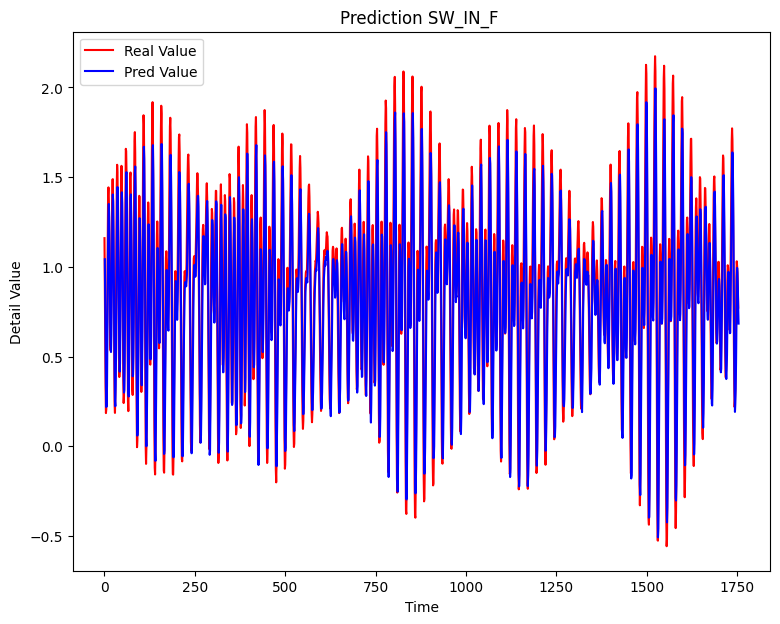

MSE: 0.00803389030458093
MAE: 0.07173014370524515
R²: 0.9699383370844683
RMSE: 0.08963197144200796
nRMSE: [0.0328202]


In [12]:
def nRMSE(rmse,y_true):
    return rmse / (max(y_true) - min(y_true))
plt.figure(figsize=(9, 7))
plt.plot(y_true, color='red', label='Real Value')
plt.plot(pred, color='blue', label='Pred Value')

plt.title('Prediction SW_IN_F ')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
# plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)
plt.show()
# y_true_data = pd.DataFrame(y)
# y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
#               index=False)
# pred_data = pd.DataFrame(pred)
# pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
#              index=False)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

print('MSE:', mse(y_true, pred))
print('MAE:', mae(y_true, pred))
print('R²:', r2(y_true, pred))
print('RMSE:', np.sqrt(mse(y_true, pred)))
print('nRMSE:', nRMSE(np.sqrt(mse(y_true, pred)),y_true))
# print('pred_finally:', pred)